**Import libraries**

In [1]:
import numpy as np
import operator
import nltk
# Use below line to download stopword
# nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def read_content(file_names):
    paper_names = list()
    author_names = list()

    for file_name in file_names:
        with open(f"Texts\\{file_name}", "r") as f:
            content = f.readlines()
            f.close()

        for i in range(0, len(content), 4):
            paper_names.append(content[i])

        for i in range(1, len(content), 4):
            author_names.append(content[i])
            
    return paper_names, author_names

**Special tokenizer and function to statistic terms**

In [3]:
def my_tokenizer(text):
    """This function is used to deal with author names"""
    # Remove space after comma and newline charecter, after that, split based on comma
    return text.replace(', ', ',').replace('\n', '').split(',')
        
def statistic_keyword(collection_of_text, type_of_data, ngram_range):
    # statistic term
    if type_of_data == "paper_name":
        vectorizer = CountVectorizer(lowercase=True,
                                     stop_words=stop_words, 
                                     ngram_range=ngram_range
                                    )
        y_label = "Keyword"
    elif type_of_data == "author_name":
        vectorizer = CountVectorizer(lowercase=False,
                                     stop_words=stop_words,
                                     tokenizer=my_tokenizer
                                    )
        y_label = "Author name"
        
    # Get the frequency of each term by summing up term's column
    count = sum((vectorizer.fit_transform(collection_of_text)).toarray())
    # All the terms
    x = vectorizer.get_feature_names()
    
    return x, count

In [4]:
def statistic_2_contents(old_content, new_content, type_of_data, ngram_range):
    terms_old_year, count_old_year = statistic_keyword(old_content, type_of_data, ngram_range)
    terms_new_year, count_new_year = statistic_keyword(new_content, type_of_data, ngram_range)

    #  Statistic the difference in frequency of keyword
    # all_term = list(set(terms_old_year + terms_new_year))
    # differences = list()
    # for term in all_term:
    #     if (term in terms_old_year) and (term in terms_new_year):
    #         difference = count_new_year[terms_new_year.index(term)] - count_old_year[terms_old_year.index(term)]
    #         differences.append(difference)
    #     else:
    #         differences.append(0)


    #  Statistic the growth in frequency of keyword
    for term in terms_old_year:
        if term in terms_new_year:
            # Formula: growth_frequency = old_frequency + (new_frequency - old_frequency)
            count_old_year[terms_old_year.index(term)] += count_new_year[terms_new_year.index(term)] - count_old_year[terms_old_year.index(term)]

    all_term = terms_old_year
    differences = list(count_old_year)
    for term in terms_new_year:
        if term not in terms_old_year:
            all_term.append(term)
            differences.append(count_new_year[terms_new_year.index(term)])

    # Sort all_term and differneces decreased base on differences
    differences, all_term = zip(*sorted(zip(differences, all_term), reverse=True))
    
    return differences, all_term

In [5]:
def plot_chart(differences, all_term, amount_of_term, xlabel, ylabel, title, full_file_name):
    # Plot this amount of term
    all_term = all_term[0:amount_of_term]
    differences = differences[0:amount_of_term]

    # function to add value labels
    def addlabels(x,y):
        for i in range(len(y)):
            plt.text(x=x[i], y=i, s=x[i], ha = 'center', bbox = dict(facecolor = 'red', alpha =.8))

        # Add information about totel term used for this plot
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(x=x[0]*0.75, y=len(y)*0.85, s=f"Total keywords: {len(all_term)}", fontsize=30,
            verticalalignment='top', bbox=props)

    # Setting figure size
    plt.figure(figsize = (25, 40))

    # Making the bar chart on the data
    plt.barh(all_term, differences, align='center', height=0.8)

    # Calling the function to add value labels
    addlabels(differences, all_term)

    # plt.yticks(fontsize=1)

    # Name the title of x, y axes and the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Save the plot in pdf file type
    plt.savefig(f"Result_images\\{full_file_name}")

    # Visualizing the plot
    plt.show()

In [6]:
def statistic_and_plot_chart(old_content, new_content, type_of_data, ngram_range, 
                             amount_of_term, xlabel, ylabel, title, full_file_name):
    
    differences, all_term = statistic_2_contents(old_content, new_content, type_of_data, ngram_range)
    
    plot_chart(differences, all_term, amount_of_term, xlabel, ylabel, title, full_file_name)

**Stopword list and file names**

In [7]:
stop_words = stopwords.words('english')

new_stopwords = ["image", "images", "video", "videos", "network", "networks", "deep", 
                 "neural", "learning", "using", "visual", "object", "based", "via", "model",
                 "representation", "training"]
for word in new_stopwords:
    stop_words.append(word)
    
file_names_2017 = ["ICCV_2017.txt"]
file_names_2019 = ['Day_1_29-10-2019.txt', 'Day_2_30-10-2019.txt', 'Day_3_31-10-2019.txt', 'Day_4_01-11-2019.txt']

**Reading content of text files**

In [8]:
paper_names_2017, author_names_2017 = read_content(file_names_2017)
paper_names_2019, author_names_2019 = read_content(file_names_2019)

**Statistic difference in frequency of keyword betwwen 2017 and 2019 conference<br/>**
**And plot the Bar chart**

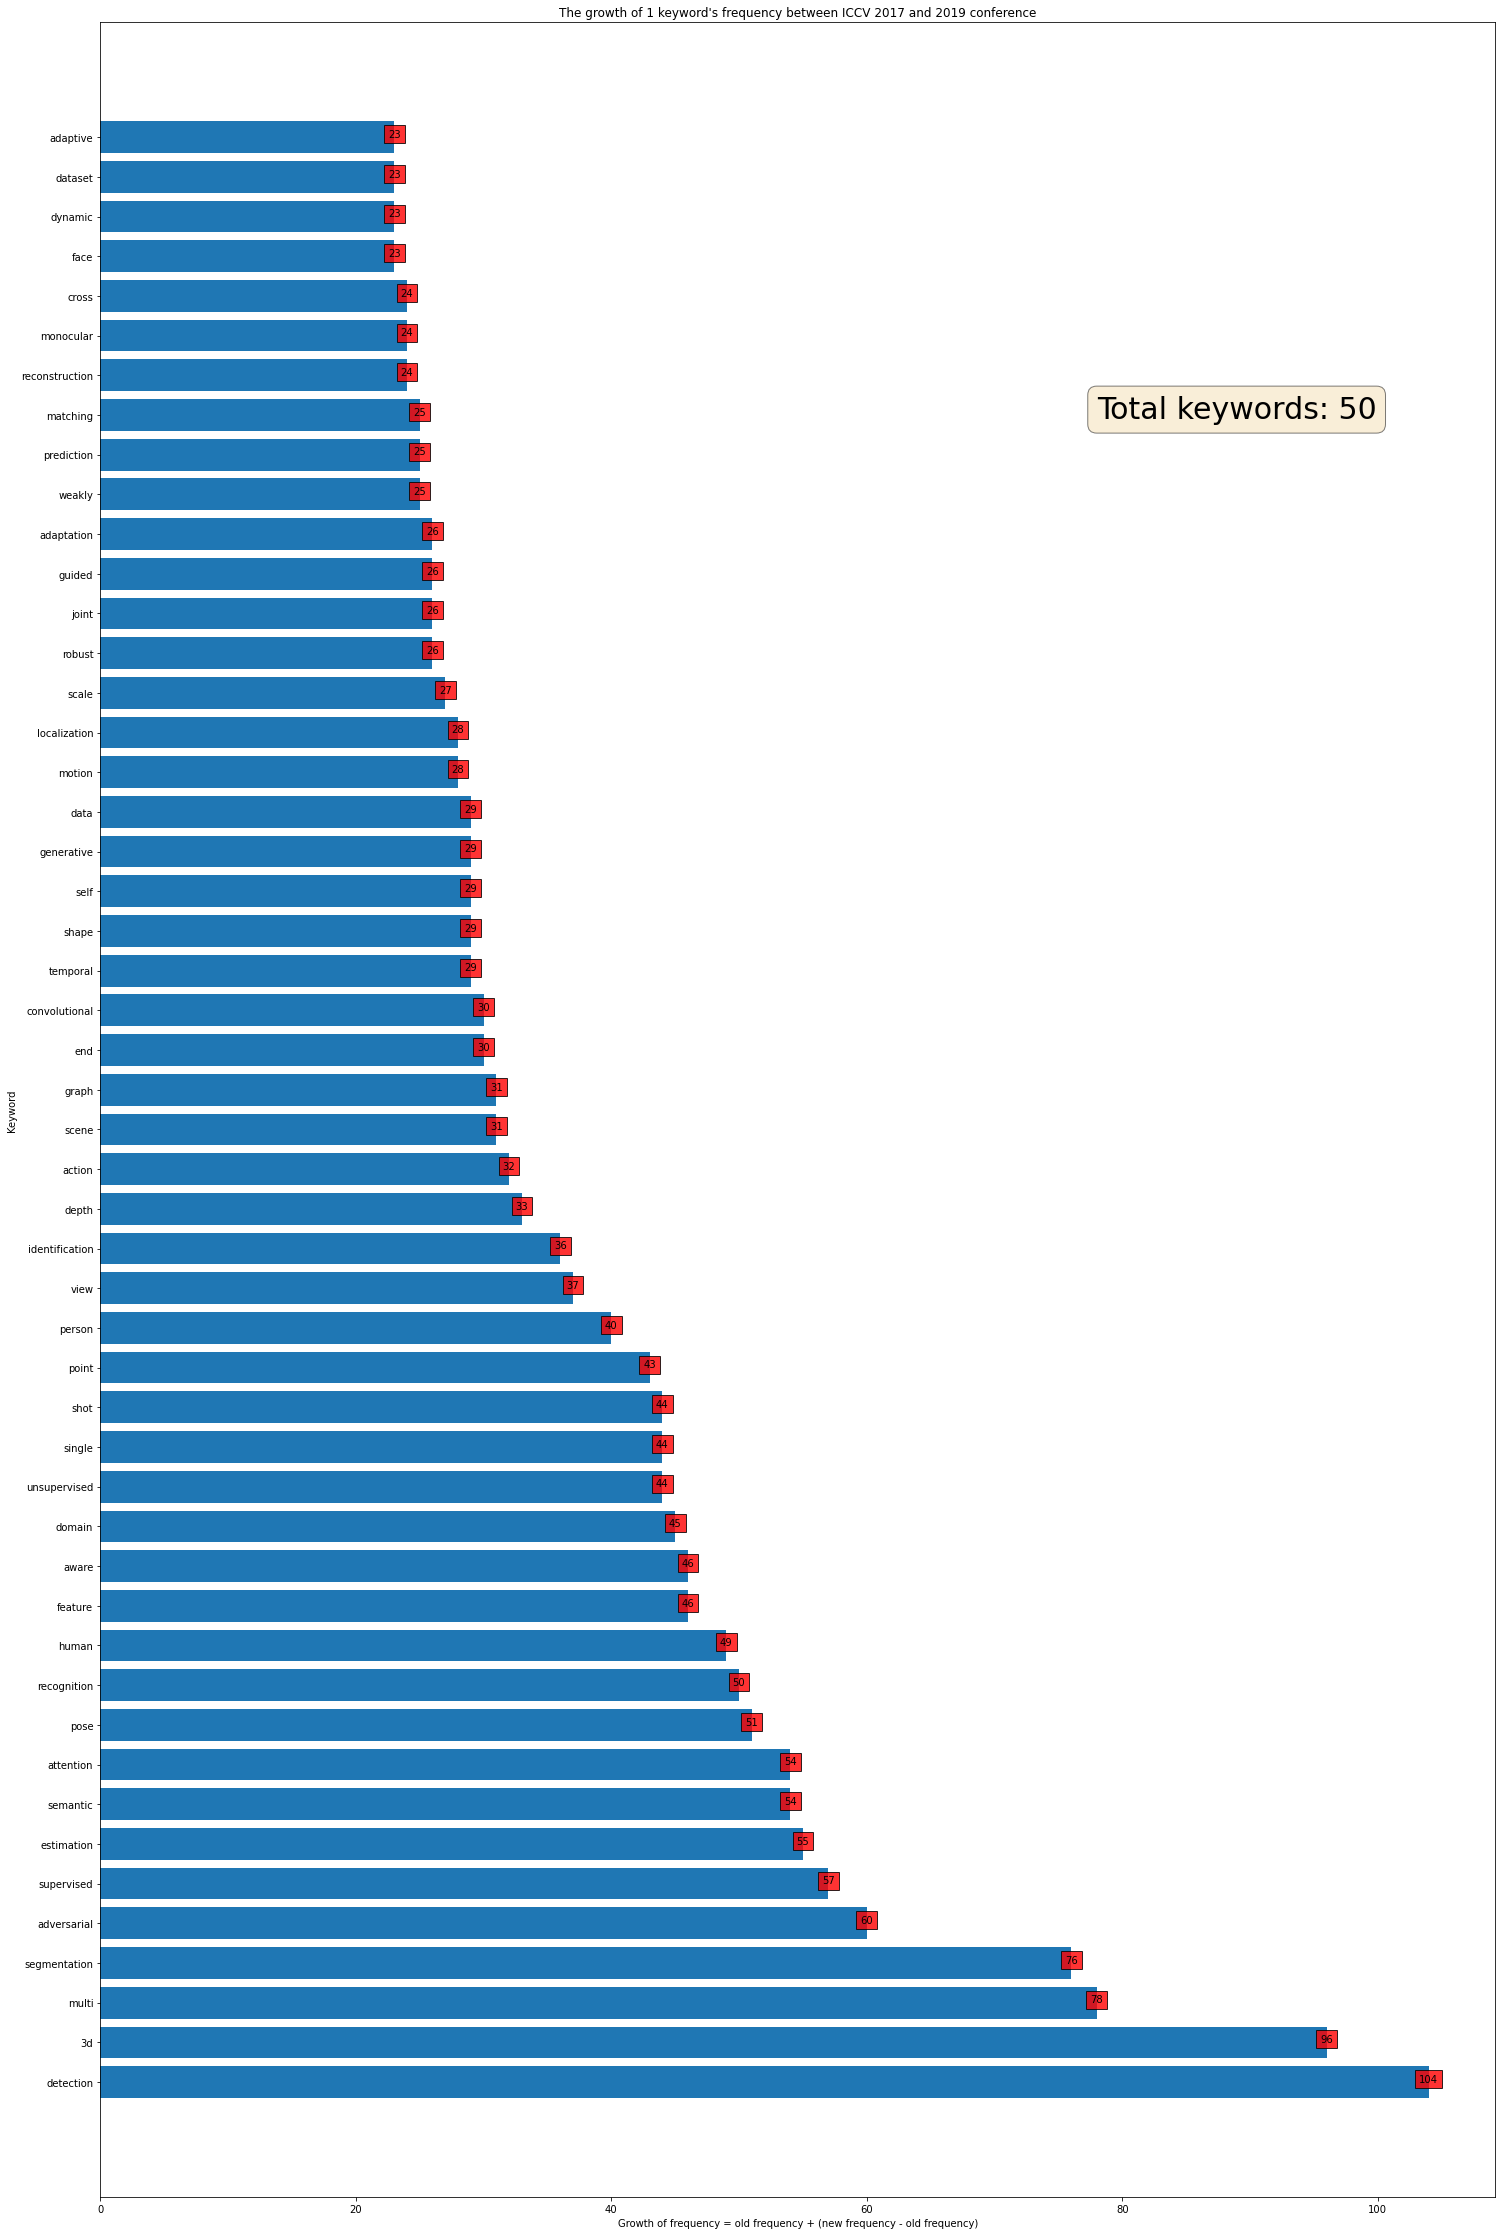

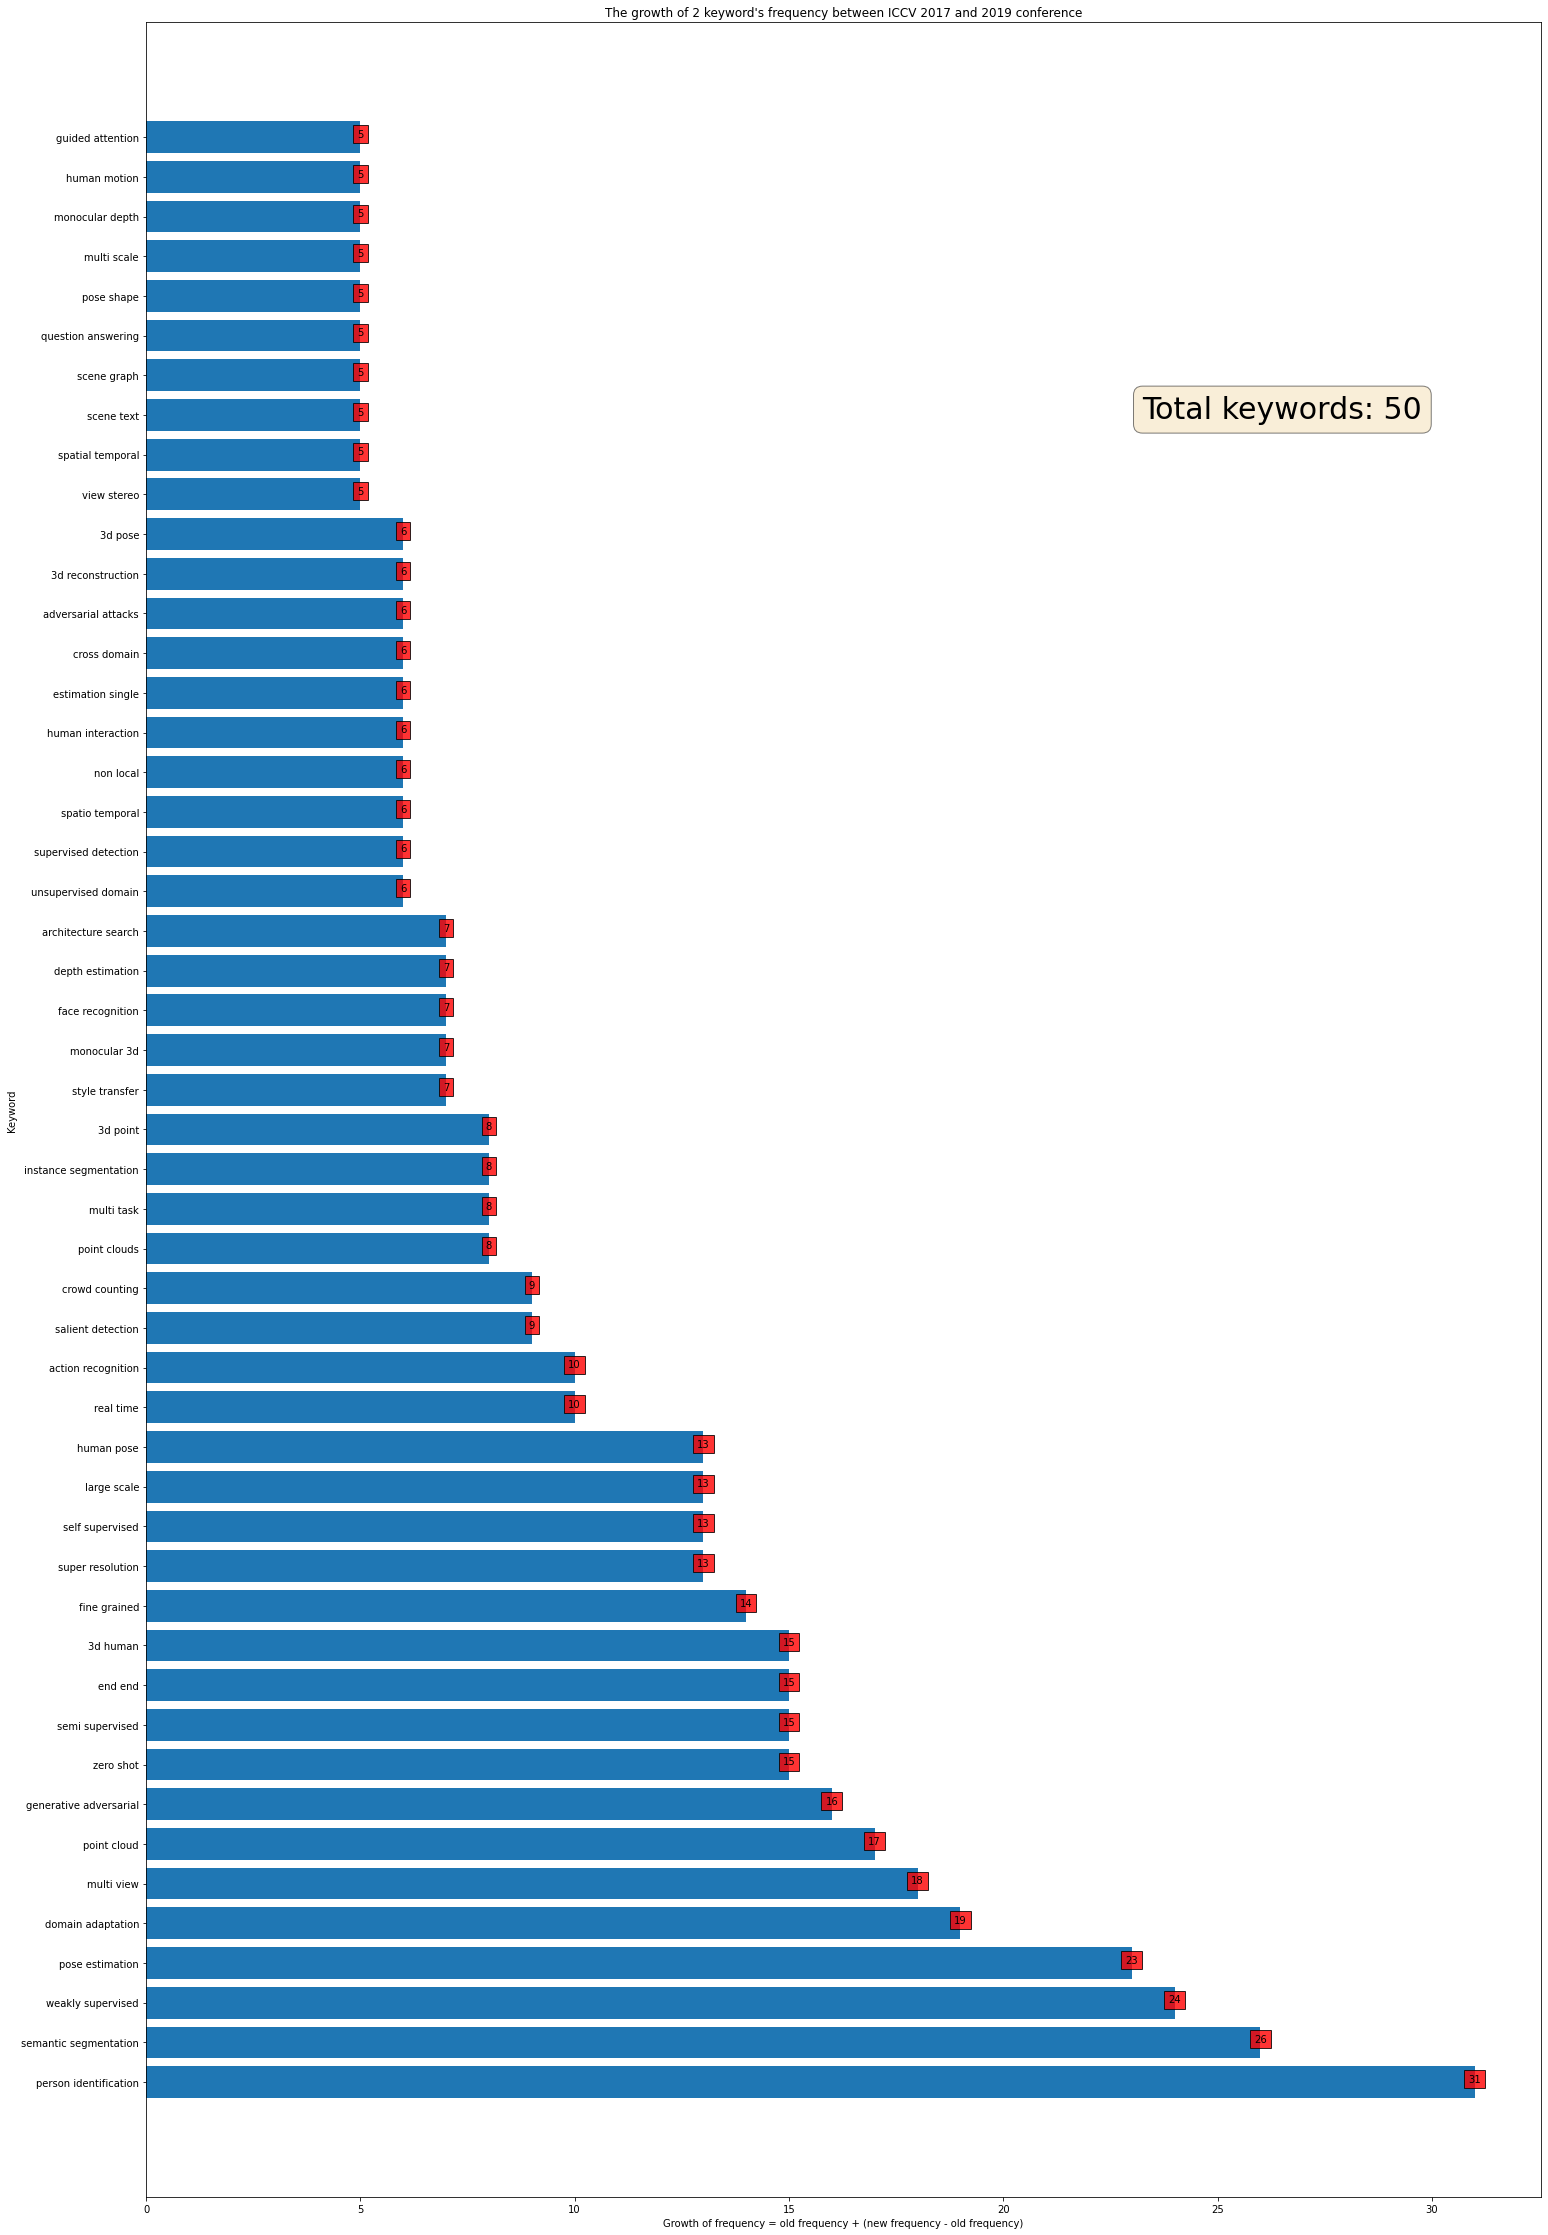

In [9]:
statistic_and_plot_chart(old_content=paper_names_2017, new_content=paper_names_2019,
                         type_of_data="paper_name", ngram_range=(1, 1),
                         amount_of_term=50, xlabel="Growth of frequency = old frequency + (new frequency - old frequency)", ylabel="Keyword", 
                         title="The growth of 1 keyword's frequency between ICCV 2017 and 2019 conference",
                         full_file_name="Frequency_growth_2017-2019_01term.pdf"
                        )

statistic_and_plot_chart(old_content=paper_names_2017, new_content=paper_names_2019,
                         type_of_data="paper_name", ngram_range=(2, 2),
                         amount_of_term=50, xlabel="Growth of frequency = old frequency + (new frequency - old frequency)", ylabel="Keyword", 
                         title="The growth of 2 keyword's frequency between ICCV 2017 and 2019 conference",
                         full_file_name="Frequency_growth_2017-2019_02term.pdf"
                        )